#안녕하세요

2024.01.28 시작하도록 하겠습니다.

오늘의 주제는

Constant Overlap-Add (COLA)

Nonzero overlap add (NOLA)

Melspectrogram

진동역학적 통계

데이터 처리 기법
PCA





어제까지는 STFT 에 대해서 배웠습니다.
오늘은 COLA(Constant OverLap Add) 에 대해 학습 하고 무엇인지 확인하겠습니다

 Constant OverLap Add (Overlap add 의 상수)

 그럼 overlap add 의 상수는 무엇일까요?

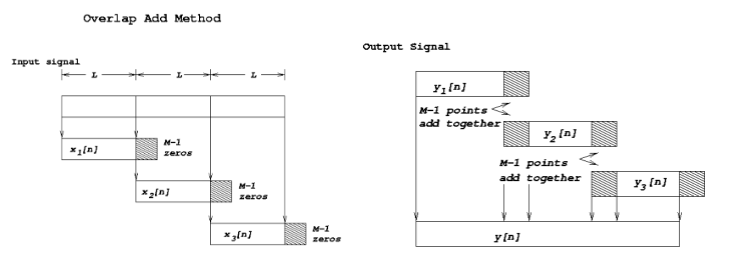

Overlap add 는 위와 같이 Input signal 기준으로 데이터를 처리하는 경우
특정 공간에서는 그 값이 중첩되는 효과를 보이는 것을 의미합니다.

뒤에 zero를 더 붙여서 N을 만들어내는 것 을 의미하고 있습니다.

근데 이게 왜 필요할까요? 이거에 대해서는 정말 좋은 자료가 하나 있습니다!

https://community.sw.siemens.com/s/article/Overlap-What-Why-and-How-to-use-it


결국 데이터 처리 과정에서 데이터의 누실을 막고
좀더 정확하게 볼 수 있도록 데이터를 Overlap 하는 것이죠

근데 이런 Overlap 는 근본적으로 Window 의 종류와 함께 결정되어야 하는 요소 입니다.

그리고 이런 Overlap 정도를 조절하고 싶어하시는 데이터 분석가 분들이 계시는거죠

이런 것을 위해 Overlap 을 어떤 상수가 존재하여 그 상수 만큼 Overlap add 를 하는 것입니다.

이를 COLA (Constant Overlap-Add) 라고 합니다

https://dsp.stackexchange.com/questions/13436/choosing-the-right-overlap-for-a-window-function

여기를 읽어보시면 윈도우의 종류에 따라 적절한 COLA 를 지정할 수 있다는 것을 알 수 있습니다.

여기까지 이해하셨다면 NOLA 는 이해하시기 쉽습니다.



Nonzero overlap add (NOLA)

https://docs.cupy.dev/en/latest/reference/generated/cupyx.scipy.signal.check_NOLA.html

COLA 라는 좋은 기능을 일부러 ≠ 0 되도록 하여 그래프를 제작 하려는 방법이죠.

솔직히 NOLA 는 많이 사용해보진 않았습니다!

Inverse STFT 를 사용할때 일부러 확인하는 과정인것이죠.

Melspectrogram 은 STFT 를 하는 과정에서 인간의 청각 특성을 활용하는 방법입니다.

지금 저희의 모든 팀이 진동데이터 만을 활용하고 있으므로 소리 데이터는 없지만 이를 알고는 계셔야겠죠!

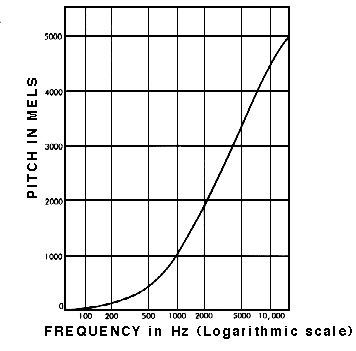

이 그래프가 청각 특성을 반영하는 Mel-scale 입니다.

즉 고주파의 소리는 잘 파악 못하고
저주파의 소리는 잘 파악하는 인간의 특성을 반영한 것입니다.
그래도 한번쯤은 적용 해보는 것도 재미있겠죠?

하지만 진동 특성을 정확하게 하기 위해서는 다음의 특성을 더욱 배우셔야 합니다.

#말씀 드린 Data Driven / Physics Driven의 차이가 여기서 나옵니다.


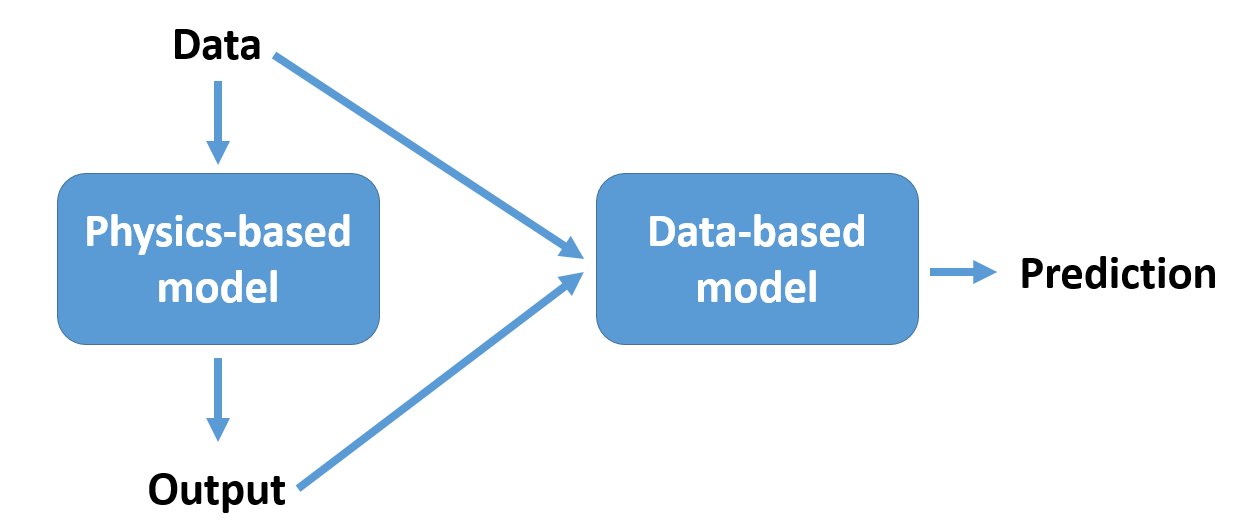

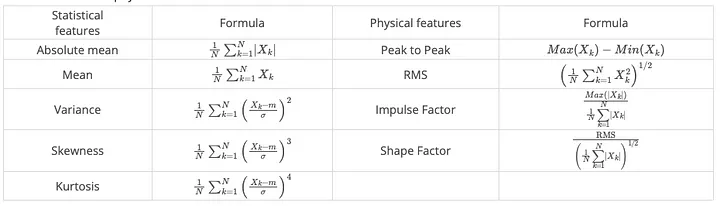

일반적으로 사용되는 DD 기반의 Features 와
일반적으로 사용되는 PD 기반의 Features를 적어두었습니다.

이를 구하기는 매우 쉽게 구할 수 있어요

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def sin_wave(amp, freq, time): #Sin 함수 만들기
    return amp * np.sin(2*np.pi*freq*time)

In [ ]:
time = np.arange(0, 10, 0.001) #0~10초간 0.001 단위로 쪼개서 Time array 만들기
                               #np.arange(0, 10, 0.001) 의 경우 start=0, stop=10, step=0.001
sin1 = sin_wave(1, 10, time) #Sin wave 함수를 호출하여 1 amp / 10 freq / time 만큼 생성
sin2 = sin_wave(2, 5, time)  #위와 동일 Sin wave 함수를 호출
sin3 = sin_wave(4, 1, time)  #위와 동일 Sin wave 함수를 호출

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(time, sin1, label=r"$\sin {20\pi} t$", color='red')
plt.plot(time, sin2, label=r"$2\sin {10\pi} t$", color='blue')
plt.plot(time, sin3, label=r"$4\sin {2\pi} t$", color='green')
plt.legend(); plt.grid(); plt.show()

In [ ]:
sin_sum = sin1 + sin2 + sin3

In [ ]:
time = np.arange(0, 10, 0.001)# 40000 개
plt.figure(figsize=(12,5))
plt.plot(time, sin_sum)
plt.grid()
plt.show()

어제 사용했던 그래프입니다.

In [ ]:
import scipy

In [ ]:
M1 = np.mean(sin_sum)
M2 = np.var(sin_sum)
M3 = scipy.stats.skew(sin_sum)
M4 = scipy.stats.kurtosis(sin_sum)

In [ ]:
print (M1, M2, M3, M4)

만약 Concat 했던 그래프는 어떨까요?

In [ ]:
sin_concat = np.concatenate((sin1, sin2, sin3, sin_sum))
time = np.arange(0, 40, 0.001)# 40000 개
plt.figure(figsize=(12,5))
plt.plot(time, sin_concat)
plt.grid()
plt.show()

In [ ]:
M1 = np.mean(sin_concat)
M2 = np.var(sin_concat)
M3 = scipy.stats.skew(sin_concat)
M4 = scipy.stats.kurtosis(sin_concat)

In [ ]:
print (M1, M2, M3, M4)

In [ ]:
n = len(sin_concat)
k = np.arange(n)
Fs = 1/0.001; T = n/Fs
freq = k/T

In [ ]:
fft_values = np.fft.fft(sin_concat)  # FFT 수행
single_side_fft = np.abs(fft_values[:n // 2]) /n  # 양측 주파수 스펙트럼 계산

# 주파수 스펙트럼 그리기
plt.plot(freq[:n // 2], single_side_fft)
plt.title('Single Side FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Sin wave 함수 정의
def sin_wave(amplitude, frequency, time):
    return amplitude * np.sin(2 * np.pi * frequency * time)

# 시간 배열 생성
time = np.arange(0, 10, 0.001)

# Sin wave 생성
sin1 = sin_wave(1, 10, time)
sin2 = sin_wave(2, 5, time)
sin3 = sin_wave(4, 1, time)

# Sin wave의 합 생성
sin_sum = sin1 + sin2 + sin3

# FFT 계산
n = len(sin_sum)
k = np.arange(n)
Fs = 1 / 0.001
T = n / Fs
freq = k / T
fft_values = np.fft.fft(sin_sum)  # FFT 수행
single_side_fft = np.abs(fft_values[:n // 2]) / n  # 양측 주파수 스펙트럼 계산

# 주파수 스펙트럼 그리기
plt.plot(freq[:n // 2], single_side_fft)
plt.title('Single Side FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

# 피크 찾기
peaks, _ = find_peaks(single_side_fft, height=0.2)

# 피크의 위치 및 높이 출력
print(f"Index of each peak: {peaks}")
print(f"Frequency of each peak: {freq[peaks]} Hz")
print(f"Height of each peak: {single_side_fft[peaks]}")

# 주파수 스펙트럼 및 피크 시각화
plt.plot(freq[:n // 2], single_side_fft)
plt.plot(peaks/10, single_side_fft[peaks], "x")
plt.title('Single Side FFT with Peaks')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

RMS 값을 구하고 싶다면

In [ ]:
rms = np.sqrt(np.mean(single_side_fft**2))
print(f"RMS in Frequency Domain: {rms}")

Impulse Factor 를 구하고 싶다면

In [ ]:
impulse_factor = np.max(single_side_fft) / rms
print(f"Impulse Factor: {impulse_factor}")

Shape Factor 를 구하고 싶다면

In [ ]:
shape_factor = rms / np.max(single_side_fft)
print(f"Shape Factor: {shape_factor}")

이런식으로 Data features 를 표현 할 수 있습니다.

하나의 데이터 셋 혹은 데이터셋 을 갈무리 ~~개 / ~~초 하여


해당 feature 를 이용하면서 기타 정보를 라벨링 추가 하는 것이 좋겠죠!

내일은 모델링 과 관련된 부분을 진행하도록 하겠습니다!

감사드립니다!